# Pupil Metrics Analysis

This notebook demonstrates computing various pupil response metrics:
- PLR (Pupillary Light Reflex) metrics
- PIPR (Post-Illumination Pupil Response) metrics
- Baseline measurements
- Peak constriction analysis

## How to use this notebook

Run the notebook top-to-bottom. The examples use `pypipr`'s simulated data and helper functions to compute common pupil metrics. Replace the simulated `PupilMeasurement` with your own recordings to apply the same analysis to real data.

+Note: many metric functions expect a light-stimulus to be set on the `PupilMeasurement` object so post-stimulus windows (e.g., 2s, 6s) are measured relative to stimulus onset.

In [1]:
# Import necessary libraries
from matplotlib import pyplot as plt
import pypipr

## Quick note

The examples below compute peak constriction, time-to-peak, PIPR and average pupil sizes at fixed windows. Metric functions expect a `PupilMeasurement` with a light-stimulus set so post-stimulus windows are measured relative to stimulus onset.

In [2]:
# Placeholder cell — proceed to the examples below

## Peak constriction and time-to-peak

This example computes the maximum constriction (peak change) and the time to reach it after stimulus onset. The point is overlaid on the trace for visual confirmation.

C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\pupil_metrics.py:152: UserWarning: The peak constriction function assumes the size is already relative to the baseline.
  warnings.warn(
C:\Users\20182727\OneDrive - TU Eindhoven\Documents\Tools\pypipr_package\pypipr\analysis\pupil_metrics.py:194: UserWarning: This does not correctly account for the pupil escape.
  warnings.warn("This does not correctly account for the pupil escape.")


Peak Constriction: 4.01 mm
Time to reach peak constriction: 0.93 s
Time of peak constriction: -0.07 s


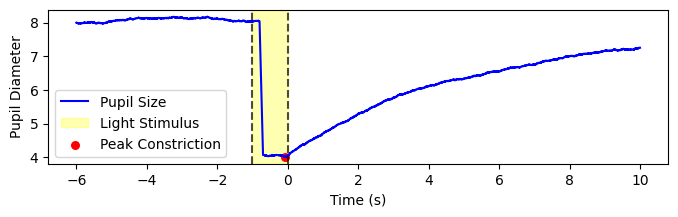

In [3]:
# Load sample data
pm = pypipr.load_simulated_pupil()
# Basic metrics computation
peak_constriction = pm.peak_constriction()
time_to_peak = pm.time_to_peak()
time_of_peak = time_to_peak + pm.get_light_stimulus().get_time()[0]
print(f"Peak Constriction: {peak_constriction:.2f} mm")
print(f'Time to reach peak constriction: {time_to_peak:.2f} s')
print(f'Time of peak constriction: {time_of_peak:.2f} s')

fig, ax = plt.subplots(1, 1, figsize=(8, 2), sharex=True)
pm.plot(ax=ax, label='Pupil Size', color='blue')
pm.plot_light_stimulus(ax=ax, color='yellow', alpha=0.3)
ax.scatter(time_of_peak, peak_constriction, color="red", label="Peak Constriction", s=30)
ax.legend()

plt.show()



## PIPR and average-size at fixed windows

PIPR metrics measure pupil size at specific times after the stimulus (for example, 6s-PIPR). This section shows how to compute the average size at a time window and the predefined 6s PIPR.

Average pupil size at 6 seconds post-stimulus: 6.57 mm
6s-PIPR: 6.57 mm


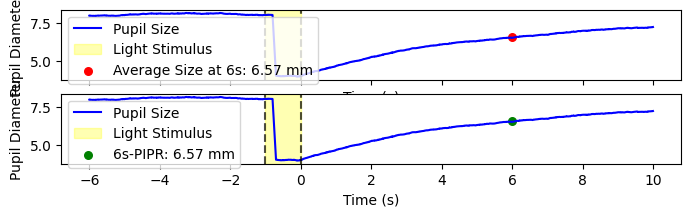

In [ ]:
# Load sample data
pm = pypipr.load_simulated_pupil()
# Average size
# The average size can be determined from the pupil size data.
average_size_6s = pm.get_average_size(start_time=5.5, end_time=6.5)
print(f"Average pupil size at 6 seconds post-stimulus: {average_size_6s:.2f} mm")
# Getting the 6s-pipr is very similar to getting the average size, but uses predefined time windows.
pipr_6s = pm.pipr_6s()
print(f"6s-PIPR: {pipr_6s:.2f} mm")

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(8, 2), sharex=True)

pm.plot(ax=ax[0], label="Pupil Size", color="blue")
pm.plot(ax=ax[1], label="Pupil Size", color="blue")

pm.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3)
pm.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3)

ax[0].scatter(
    6,
    average_size_6s,
    color="red",
    label=f"Average Size at 6s: {average_size_6s:.2f} mm",
    s=30,
)
ax[1].scatter(6, pipr_6s, color="green", label=f"6s-PIPR: {pipr_6s:.2f} mm", s=30)

ax[0].legend()
ax[1].legend()
plt.show()

## Shifted-stimulus example and multiple PIPR windows

This example shifts the time base and sets a stimulus so we can compute PIPR values at different post-stimulus windows (2s, 6s, 8s). It also shows how the averages change when the stimulus timing is altered.

PIPR at 2 seconds post-stimulus: 5.26 mm
PIPR at 6 seconds post-stimulus: 6.57 mm
PIPR at 8 seconds post-stimulus: 6.99 mm
Average pupil size at 2 seconds: 4.14 mm
Average pupil size at 6 seconds: 6.11 mm
Average pupil size at 8 seconds: 6.57 mm


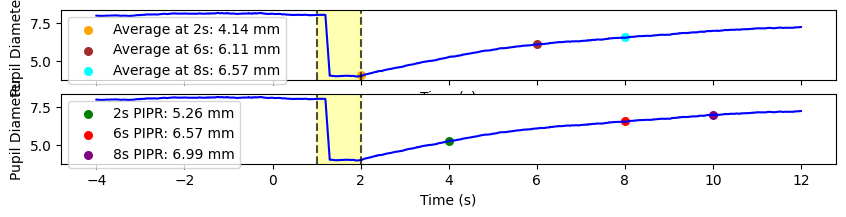

In [ ]:
# Let's create a pupil measurement where the light stimulus is from 1 to 2 seconds.
pm = pypipr.load_simulated_pupil()
pm.set_time_offset(2.0)  # Shift time so stimulus starts at 1s
pm.set_light_stimulus(1.0, 2.0)




# The PIPR calculations remain the same, it takes the stimulus into account. 
# Now let's calculate the PIPR at 2, 6, and 8 seconds post-stimulus.

# There is a short hand for the 6s pipr.
pipr_6s = pm.pipr_6s()
# Other times need to be manually defined.
pipr_2s = pm.pipr_xs(start=1.5, end=2.5)
pipr_8s = pm.pipr_xs(start=7.5, end=8.5)

print(f"PIPR at 2 seconds post-stimulus: {pipr_2s:.2f} mm")
print(f"PIPR at 6 seconds post-stimulus: {pipr_6s:.2f} mm")
print(f"PIPR at 8 seconds post-stimulus: {pipr_8s:.2f} mm")


# The average is different now that the stimulus timing has changed.
average_2s = pm.get_average_size(start_time=1.5, end_time=2.5)
average_6s = pm.get_average_size(start_time=5.5, end_time=6.5)
average_8s = pm.get_average_size(start_time=7.5, end_time=8.5)
print(f"Average pupil size at 2 seconds: {average_2s:.2f} mm")
print(f"Average pupil size at 6 seconds: {average_6s:.2f} mm")
print(f"Average pupil size at 8 seconds: {average_8s:.2f} mm")


fig, ax = plt.subplots(2, 1, figsize=(10, 2), sharex=True)
pm.plot(ax=ax[0], label="_", color="blue")
pm.plot(ax=ax[1], label="_", color="blue")
pm.plot_light_stimulus(ax=ax[0], color="yellow", alpha=0.3, label='_')
pm.plot_light_stimulus(ax=ax[1], color="yellow", alpha=0.3, label='_')

ax[0].scatter(2, average_2s, color="orange", label=f"Average at 2s: {average_2s:.2f} mm", s=30)
ax[0].scatter(6, average_6s, color="brown", label=f"Average at 6s: {average_6s:.2f} mm", s=30)
ax[0].scatter(8, average_8s, color="cyan", label=f"Average at 8s: {average_8s:.2f} mm", s=30)

ax[1].scatter(4, pipr_2s, color="green", label=f"2s PIPR: {pipr_2s:.2f} mm", s=30)
ax[1].scatter(8, pipr_6s, color="red", label=f"6s PIPR: {pipr_6s:.2f} mm", s=30)
ax[1].scatter(10, pipr_8s, color="purple", label=f"8s PIPR: {pipr_8s:.2f} mm", s=30)

ax[0].legend()
ax[1].legend()

plt.show()